In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

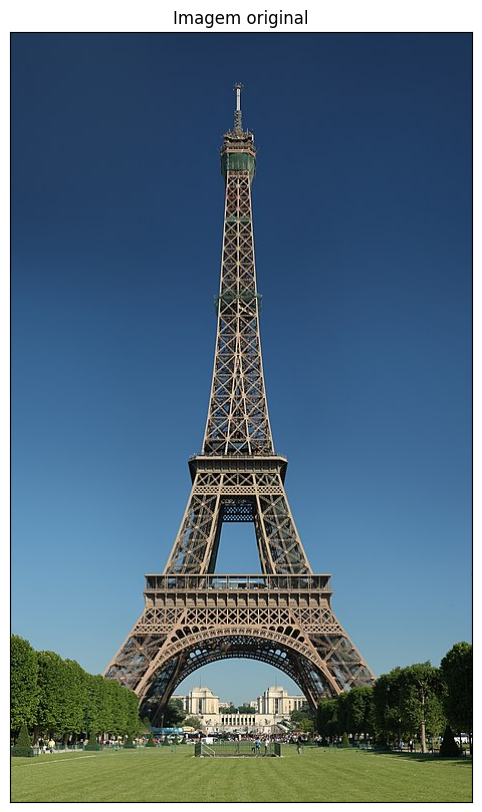

In [18]:
# Define o tamanho padrão da figura exibida
figsize = (10, 10)

def plot_im(img, title):
    """
    Exibe uma imagem com título, utilizando Matplotlib.

    Parâmetros:
    - img: A imagem a ser exibida (no formato RGB).
    - title: O título a ser exibido acima da imagem.

    A função:
    - Configura o tamanho da figura com base na variável 'figsize'.
    - Exibe a imagem com Matplotlib.
    - Remove os ticks dos eixos para uma visualização mais limpa.
    """
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])  # Remove os ticks no eixo X
    plt.yticks([])  # Remove os ticks no eixo Y
    plt.show()

# Lê a imagem "Tour_Eiffel.jpg" no formato BGR (padrão do OpenCV)
img = cv2.imread("Tour_Eiffel.jpg")

# Converte a imagem do formato BGR para RGB para exibição correta com Matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Exibe a imagem original com o título "Imagem original"
plot_im(img, "Imagem original")


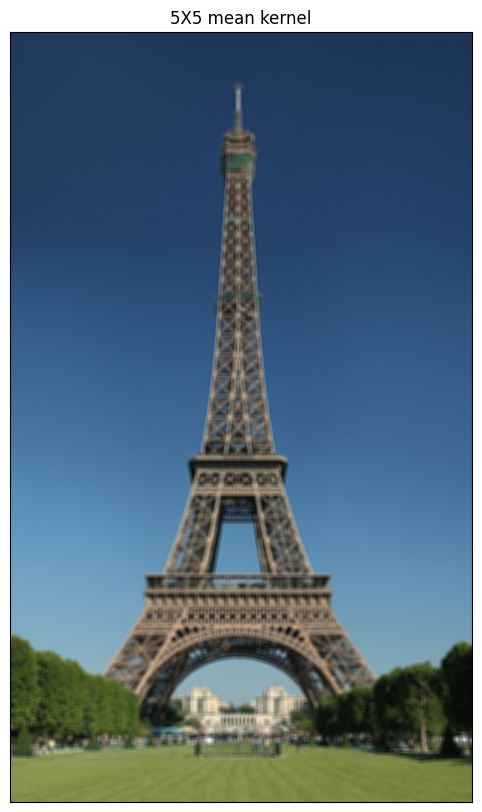

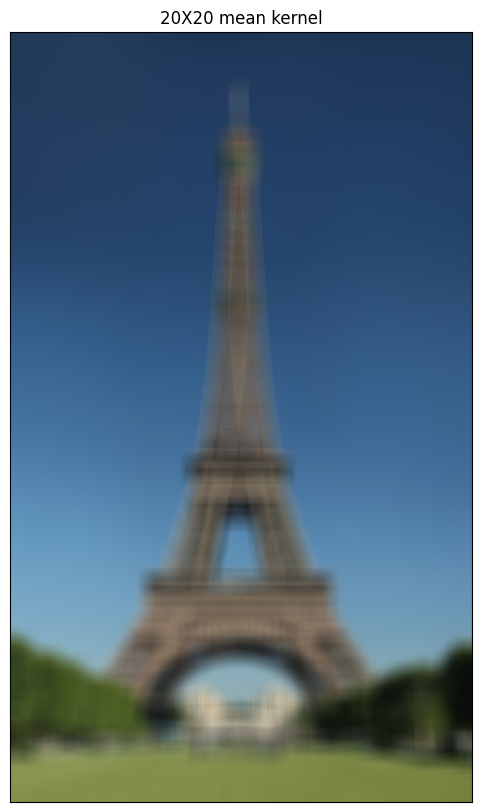

In [19]:
# Filtro médio (Mean Kernel Smoothing)

def mean_kernel_smoothing(img, sz):
    """
    Aplica um filtro de suavização com kernel médio (mean kernel) a uma imagem.

    Parâmetros:
    - img: A imagem de entrada (no formato RGB).
    - sz: O tamanho do kernel (um inteiro positivo, define uma matriz sz x sz).

    A função:
    - Cria um kernel médio de tamanho sz x sz, onde cada elemento do kernel
      tem valor 1/(sz**2), garantindo que a soma dos elementos seja 1.
    - Aplica o filtro na imagem utilizando a função cv2.filter2D.
    - Exibe a imagem suavizada utilizando a função `plot_im`, com o título indicando
      o tamanho do kernel.
    """
    # Criação do kernel médio
    kernel = np.ones((sz, sz)) / (sz**2)

    # Aplicação do filtro à imagem
    dst = cv2.filter2D(img, -1, kernel)

    # Exibição da imagem suavizada
    plot_im(dst, str(sz) + "X" + str(sz) + " mean kernel")

# Aplica o filtro de suavização com kernel de 5x5
mean_kernel_smoothing(img, 5)

# Aplica o filtro de suavização com kernel de 20x20
mean_kernel_smoothing(img, 20)


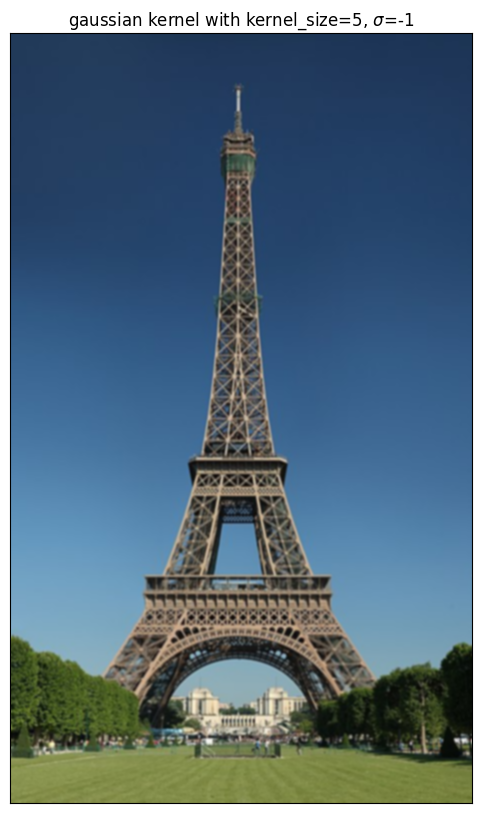

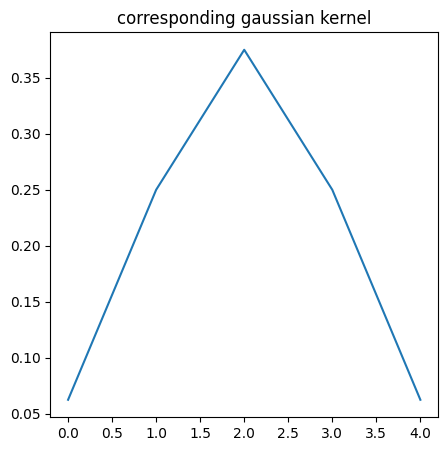

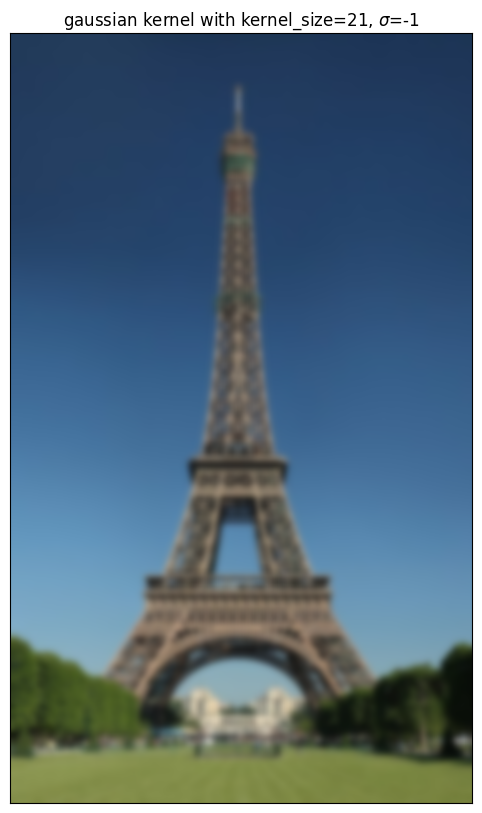

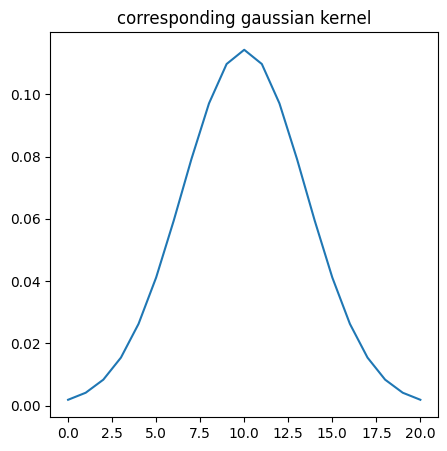

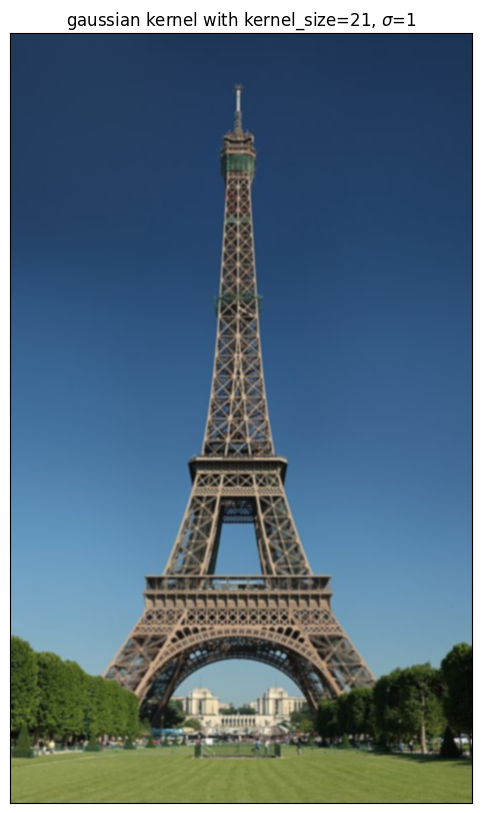

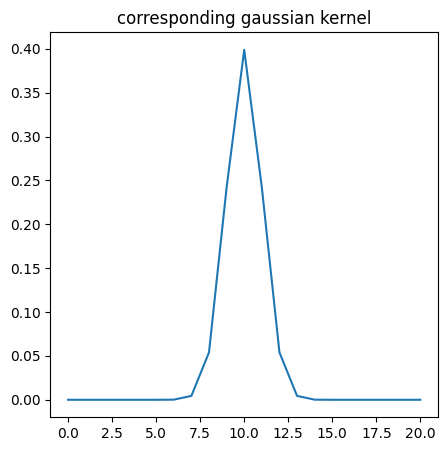

In [20]:
# Filtro Gaussiano (Gaussian Blur)

def gauss_blur(img, k_sz, sigma=-1, is_plot_kernel=False):
    """
    Aplica um filtro Gaussiano para suavização da imagem.

    Parâmetros:
    - img: A imagem de entrada (no formato RGB).
    - k_sz: O tamanho do kernel Gaussiano (deve ser um número ímpar).
    - sigma: O desvio padrão do kernel Gaussiano. Se sigma = -1, o valor será calculado automaticamente.
    - is_plot_kernel: Booleano. Se True, exibe o kernel Gaussiano correspondente em um gráfico.

    A função:
    - Aplica o filtro Gaussiano utilizando a função `cv2.GaussianBlur` do OpenCV.
    - Exibe a imagem suavizada utilizando a função `plot_im`, com título indicando o tamanho do kernel e o valor de sigma.
    - Opcionalmente, exibe o kernel Gaussiano correspondente como um gráfico se `is_plot_kernel` for True.
    """
    # Aplica o filtro Gaussiano na imagem
    blur = cv2.GaussianBlur(img, (k_sz, k_sz), sigma)

    # Exibição da imagem suavizada
    plot_im(
        blur,
        "gaussian kernel with kernel_size=" + str(k_sz) + r", $\sigma$=" + str(sigma),
    )

    # Exibição do kernel Gaussiano correspondente (se solicitado)
    if is_plot_kernel:
        # sigma=-1 fará com que o sigma seja definido automaticamente
        gauss_ker = cv2.getGaussianKernel(k_sz, sigma)
        plt.figure(figsize=(figsize[0] / 2, figsize[1] / 2))
        plt.plot(gauss_ker)
        plt.title("corresponding gaussian kernel")
        plt.show()

# Aplica o filtro Gaussiano com diferentes parâmetros
gauss_blur(img, 5, is_plot_kernel=True)      # Kernel 5x5, sigma calculado automaticamente
gauss_blur(img, 21, is_plot_kernel=True)     # Kernel 21x21, sigma calculado automaticamente
gauss_blur(img, 21, 1, is_plot_kernel=True)  # Kernel 21x21, sigma fixo em 1


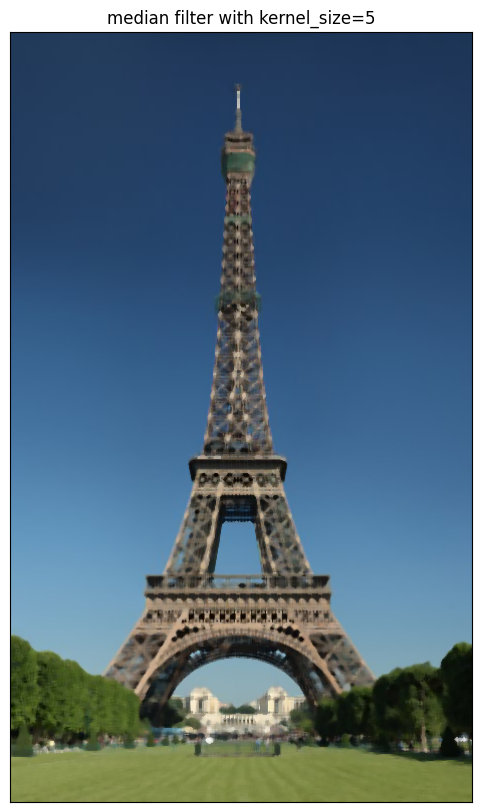

In [21]:
# Filtro Mediano (Median Filter)

def median_filter(img, k_sz):
    """
    Aplica um filtro mediano para suavização da imagem.

    Parâmetros:
    - img: A imagem de entrada (no formato RGB).
    - k_sz: O tamanho do kernel (deve ser um número ímpar).

    A função:
    - Utiliza a função `cv2.medianBlur` para aplicar o filtro mediano na imagem.
    - O filtro substitui cada pixel pelo valor mediano dos pixels vizinhos no kernel.
    - Exibe a imagem filtrada utilizando a função `plot_im`, com título indicando o tamanho do kernel.
    """
    # Aplica o filtro mediano à imagem
    res = cv2.medianBlur(img, k_sz)

    # Exibe a imagem filtrada
    plot_im(res, "median filter with kernel_size=" + str(k_sz))

# Aplica o filtro mediano com um kernel de 5x5
median_filter(img, 5)


In [22]:
# Funções de Adição de Ruído

def gauss_noise(image, gauss_var=1000):
    """
    Adiciona ruído Gaussiano a uma imagem.

    Parâmetros:
    - image: A imagem de entrada (no formato RGB ou escala de cinza).
    - gauss_var: Variância do ruído Gaussiano (controla a intensidade do ruído).

    A função:
    - Gera ruído Gaussiano com média 0 e desvio padrão `sqrt(gauss_var)`.
    - Adiciona o ruído à imagem original.
    - Garante que os valores de pixel permaneçam no intervalo [0, 255] usando `np.clip`.
    - Retorna a imagem com ruído no formato uint8.
    """
    mean = 0
    sigma = gauss_var**0.5  # Desvio padrão do ruído
    gauss = np.random.normal(mean, sigma, image.shape)  # Ruído Gaussiano

    # Adiciona o ruído à imagem e ajusta os valores para o intervalo [0, 255]
    res = image + gauss
    noisy = np.clip(res, 0, 255).astype(np.uint8)
    return noisy


def s_and_p_noise(image, s_p_ratio=0.04):
    """
    Adiciona ruído Sal e Pimenta (Salt-and-Pepper) a uma imagem.

    Parâmetros:
    - image: A imagem de entrada (no formato RGB ou escala de cinza).
    - s_p_ratio: Proporção de pixels afetados pelo ruído (entre 0 e 1).

    A função:
    - Substitui pixels aleatórios da imagem por 255 (sal) ou 0 (pimenta).
    - A proporção de pixels alterados é controlada pelo parâmetro `s_p_ratio`.
    - Retorna a imagem com ruído Sal e Pimenta.
    """
    # Cria uma cópia da imagem original
    out = np.copy(image)

    # Modo "Sal" (definir pixels como 255)
    mask = np.random.rand(image.shape[0], image.shape[1]) <= s_p_ratio / 2
    out[mask] = 255

    # Modo "Pimenta" (definir pixels como 0)
    mask = np.random.rand(image.shape[0], image.shape[1]) <= s_p_ratio / 2
    out[mask] = 0

    return out


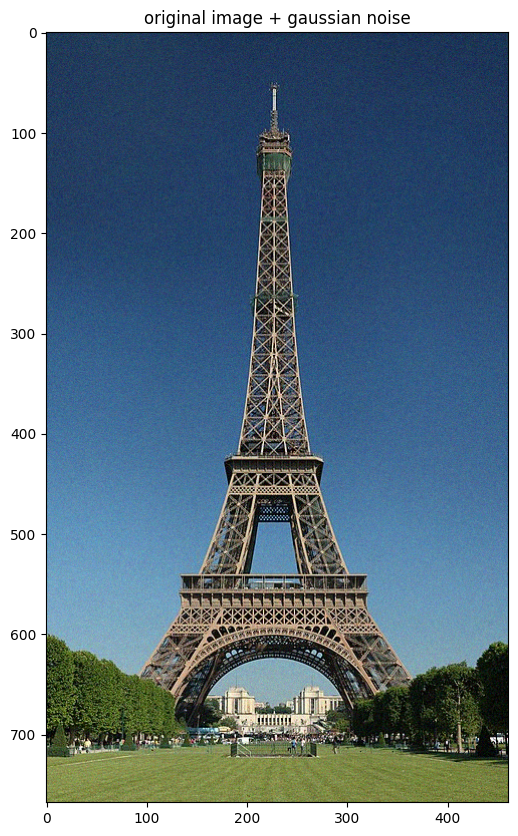

In [23]:
# Testes de Ruído Gaussiano

# Configura a semente do gerador de números aleatórios para reprodutibilidade
np.random.seed(1234)

# Adiciona ruído Gaussiano à imagem original com uma variância de 70
gauss_noise_im = gauss_noise(img, gauss_var=70)

# Exibe a imagem com ruído Gaussiano
plt.figure(figsize=figsize)
plt.imshow(gauss_noise_im)
plt.title("original image + gaussian noise")  # Título da imagem
plt.show()


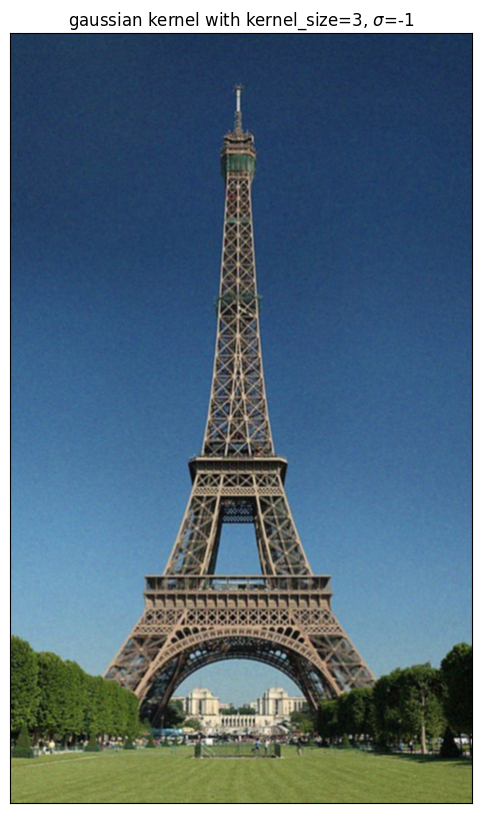

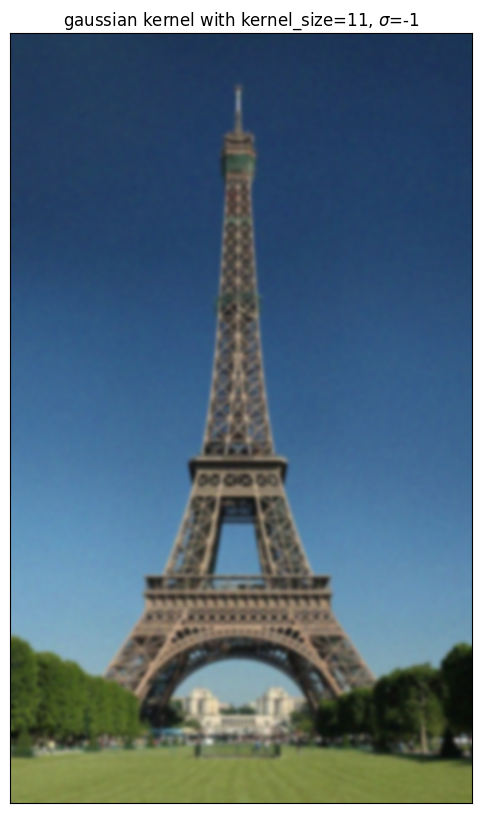

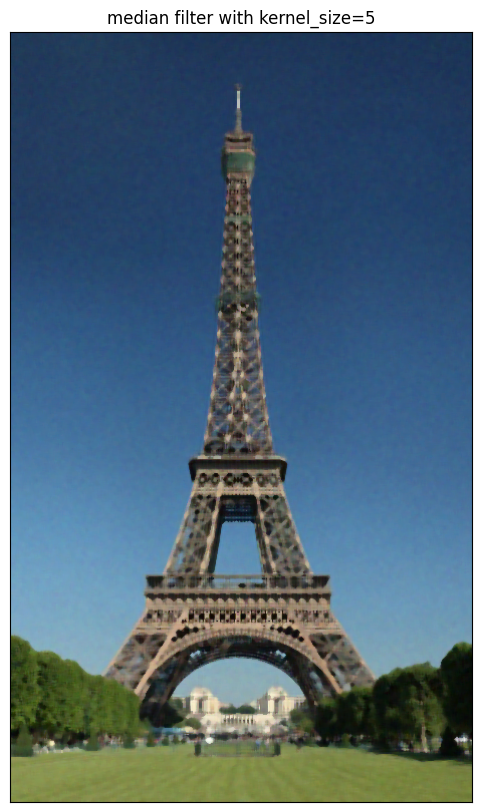

In [14]:
# Testes de Filtros em Imagem com Ruído Gaussiano

# Aplica o filtro Gaussiano com kernel 3x3 à imagem com ruído Gaussiano
gauss_blur(gauss_noise_im, 3)

# Aplica o filtro Gaussiano com kernel 11x11 à imagem com ruído Gaussiano
gauss_blur(gauss_noise_im, 11)

# Aplica o filtro mediano com kernel 5x5 à imagem com ruído Gaussiano
median_filter(gauss_noise_im, 5)


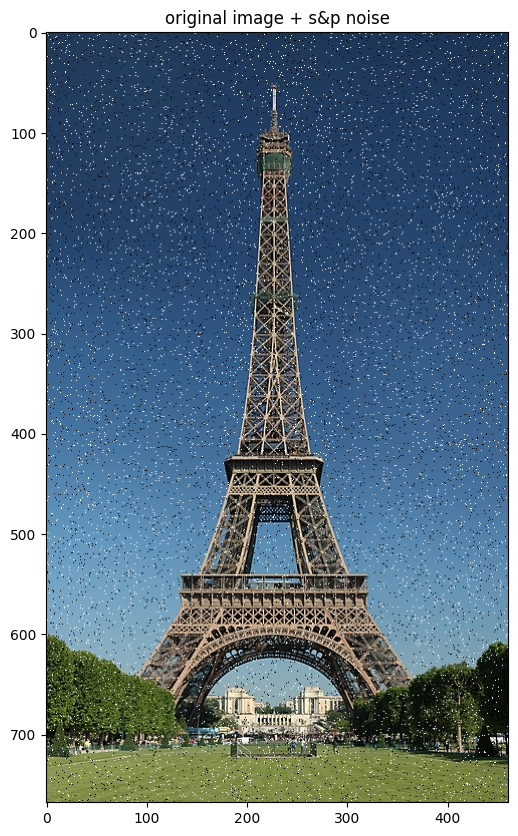

In [15]:
# Teste de Ruído Salt and Pepper

# Adiciona ruído Salt and Pepper à imagem original com uma proporção de 4% de pixels afetados
s_p_noise_im = s_and_p_noise(img, s_p_ratio=0.04)

# Exibe a imagem com ruído Salt and Pepper
plt.figure(figsize=figsize)
plt.imshow(s_p_noise_im)
plt.title("original image + s&p noise")  # Título da imagem
plt.show()
